# PCA, t-SNE

## 공통

In [1]:
# %config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## PCA

와인 분류데이터는 오염된 데이터셋으로 이제 안 쓴다.  
target의 형태가 실수로 되어있다 -> 가깝다 라는 의미가 상대적으로 정의되어 무수히 많은 비교가 필요하다 -> 지도학습이 어려움

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data = np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
print(f'데이터 집합에 누락된 값: {df.isna().sum().sum()}')
print(f'데이터 집합의 중복: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')
print(f'데이터 유형: {df.dtypes.unique()}')

데이터 집합에 누락된 값: 0
데이터 집합의 중복: 0, (0.0%)
데이터 유형: [dtype('float64')]


### 연습문제01. 전처리를 진행하세요. (minmax나 robuster도 스스로 해보자)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.52,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.85,1.01,-1.21
1,0.25,-0.50,-0.83,-2.49,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.41,1.11,0.97,-1.21
2,0.20,0.02,1.11,-0.27,0.09,0.81,1.22,-0.50,2.14,0.27,0.32,0.79,1.40,-1.21
3,1.69,-0.35,0.49,-0.81,0.93,2.49,1.47,-0.98,1.03,1.19,-0.43,1.18,2.33,-1.21
4,0.30,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04,-1.21


### 연습문제2. PCA를 적용하세요.

pca는 n_component를 몇으로 하는지가 관건이다.  
하지만 아직 우리가 판단하기에는 어려움이 따름  
고로 가장 간단하고 시각화할 수 있는 2차원으로 pca시킨다

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.52,1.45
1,-2.53,-0.33
2,-2.79,1.04
3,-3.92,2.77
4,-1.41,0.87


### 연습문제3. PCA의 결과를 시각적으로 표현하세요.

3차원으로 표현하게 된다면 이를 돌려가면서 보이지 않는 부분을 확인해야함 이는 어렵고 귀찮고 잘 안 된다

Text(0, 0.5, 'PC2')

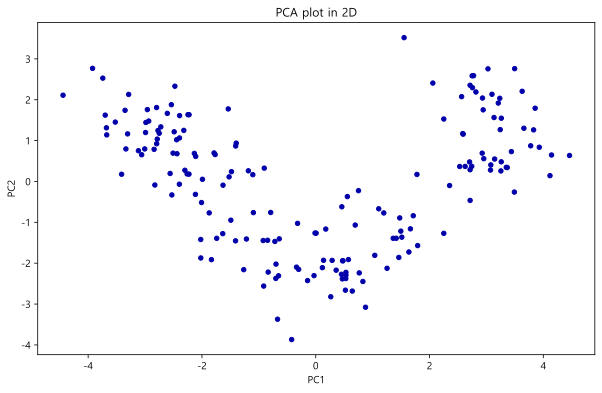

In [7]:
plt.figure(figsize=(10, 6))
plt.title('PCA plot in 2D')
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')

### 연습문제04. 적당한 그룹으로 나눠보세요.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=42)

clusters = kmeans.fit_predict(X)
print(clusters)
centroids = kmeans.cluster_centers_
print(centroids)
centroids_pca = pca.transform(centroids) # pca로 중앙을 바꾸지 않으면 중앙값이 이탈해 있을거다

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-0.909 -0.381 -0.52   0.138 -0.497 -0.096 -0.001 -0.004  0.011 -0.881
   0.433  0.231 -0.763  0.08 ]
 [ 0.187  0.905  0.249  0.584 -0.051 -0.989 -1.236  0.717 -0.75   0.988
  -1.191 -1.302 -0.38   1.347]
 [ 0.835 -0.304  0.365 -0.61   0.578  0.885  0.978 -0.562  0.58   0.171
   0.474  0.779  1.125 -1.151]]


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

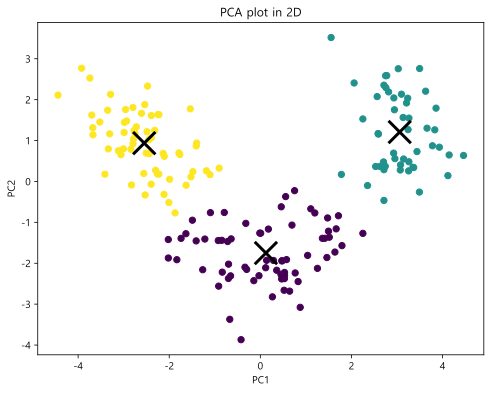

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=clusters, s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

잘 된거 같아보임  
그러나 잘 된건지 안 된건지  모른다  
해 봐야 알아

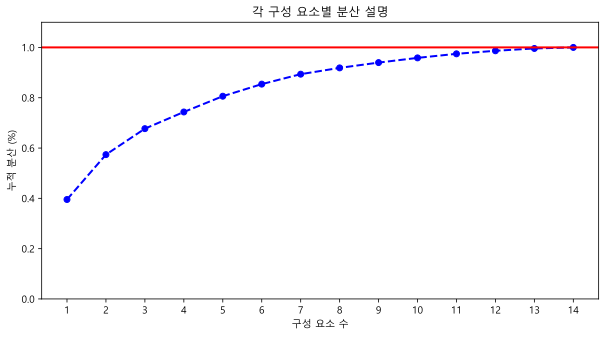

In [ ]:
pca_var = PCA()
pca_var.fit(X)
plt.figure(figsize=(10, 5))
xi = np.arange(1, 1 + X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_) # 누적합(비율의)
plt.plot(xi, yi, marker="o", linestyle="--", color="b")
plt.ylim(0.0, 1.1)
plt.xlabel("구성 요소 수")
plt.xticks(np.arange(1, 1 + X.shape[1], step=1))
plt.ylabel("누적 분산 (%)")
plt.title("각 구성 요소별 분산 설명")
plt.axhline(y=1, color="r", linestyle="-")
plt.gca().xaxis.grid(False)

단점 : tSNE은 통계적 분류라서 실행할 때마다 결과가 달라진다 & 틀어지는 결과값을 우리가 조정할 수 없어  
장점 : 논리에 힘을 실어준다

In [11]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,-9.56,11.14
1,-6.57,9.15
2,-5.06,13.35
3,-8.11,13.79
4,-1.60,10.90


Text(0, 0.5, 'tsne component 2')

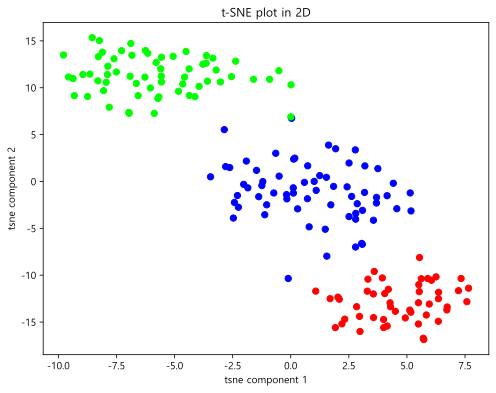

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')